Company 080b998a-8625-4e84-a82f-2d124f6eb55d
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.9285714285714286
Mean absolute percentage error (days): 2.6284242985936372%


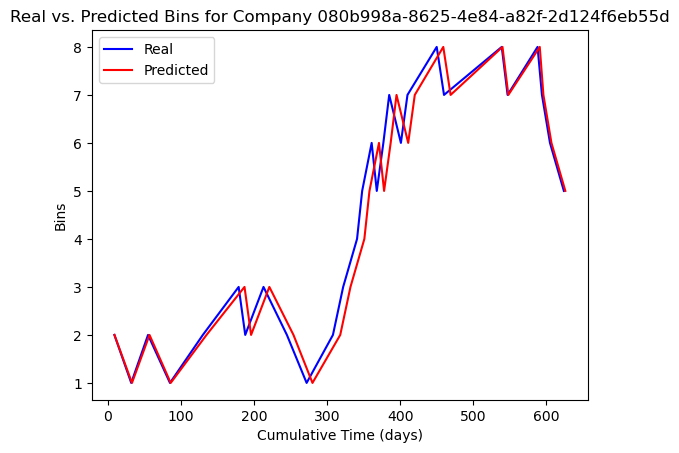

Company 0959d2b5-c474-423e-a8d8-b70a6f376d1c
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.3448275862068966
Mean absolute percentage error (days): 1.1321313862986633%


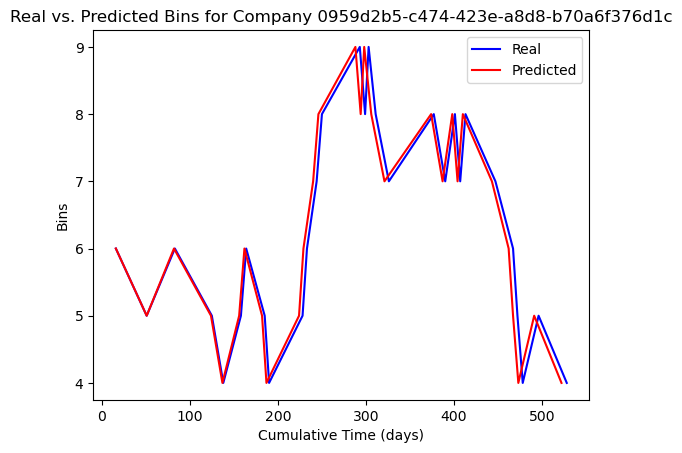

Company 10dbe3bc-3cf9-4001-856c-3ad53969f97f
Mean absolute error (bins): 0.058823529411764705
Mean absolute percentage error (bins): 0.65359477124183%
Mean absolute error (days): 0.5882352941176471
Mean absolute percentage error (days): 1.5196732609413026%


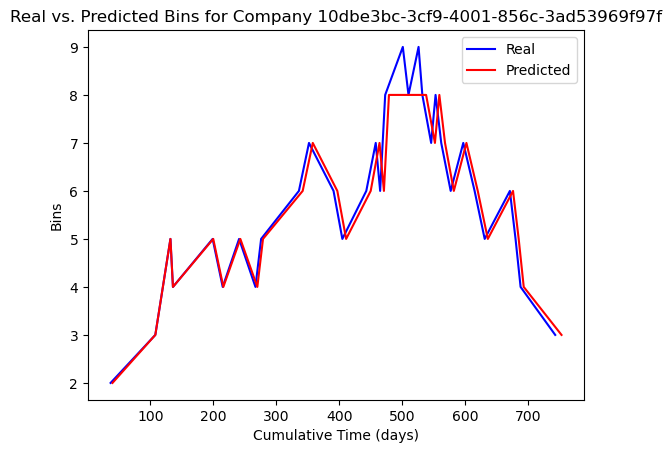

Company 1282e427-8971-44d3-a0e3-7d8da7527392
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.375
Mean absolute percentage error (days): 1.0061655524900963%


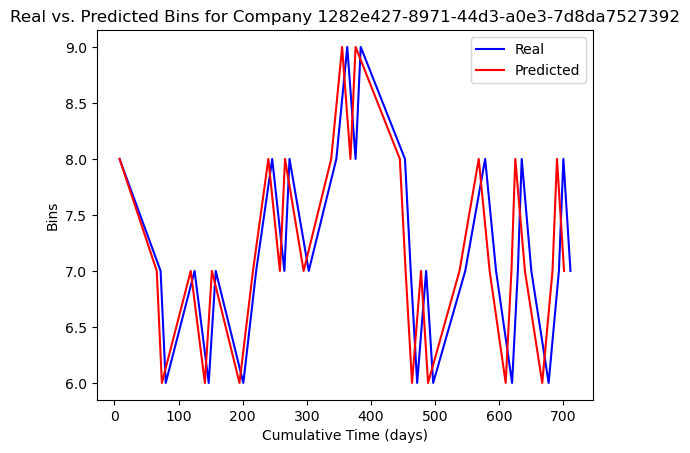

Company 131af5bc-8337-4c86-a8ed-e7deaa35d923
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 1.625
Mean absolute percentage error (days): 4.034318409318409%


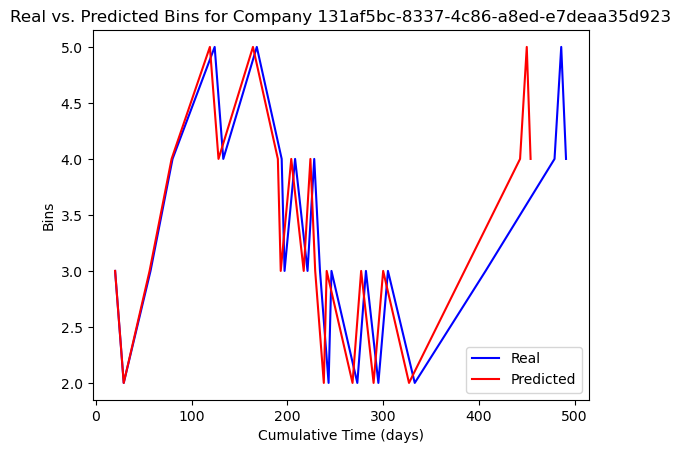

Company 1586e716-a9a4-44de-a669-08adb1647127
Mean absolute error (bins): 0.15
Mean absolute percentage error (bins): 15.0%
Mean absolute error (days): 18.333333333333332
Mean absolute percentage error (days): 5.002752297528136%


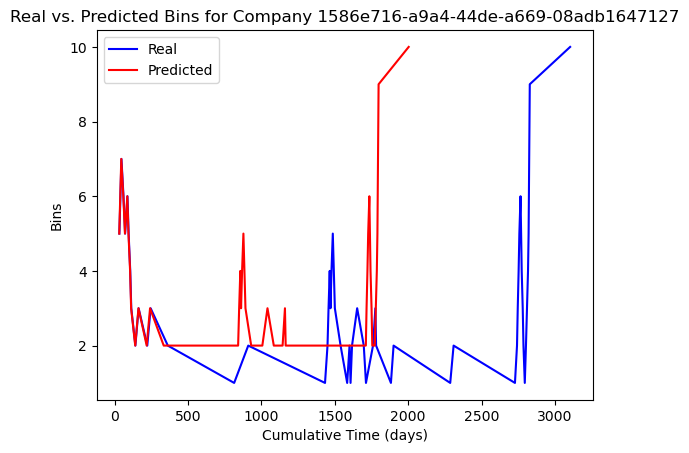

Company 204fe856-da52-48f7-b9cb-2ecf13c2d490
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 5.064102564102564
Mean absolute percentage error (days): 1.925694256025803%


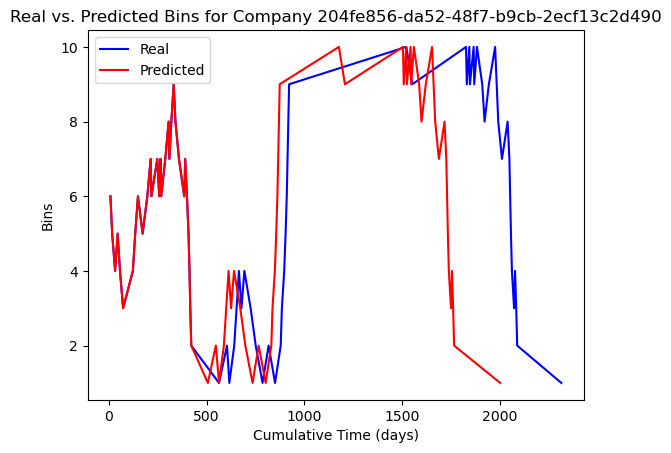

Company 24ad6818-6667-4c92-b598-bf150f6c8a53
Mean absolute error (bins): 0.1111111111111111
Mean absolute percentage error (bins): 2.7777777777777777%
Mean absolute error (days): 1.2222222222222223
Mean absolute percentage error (days): 7.397610326181756%


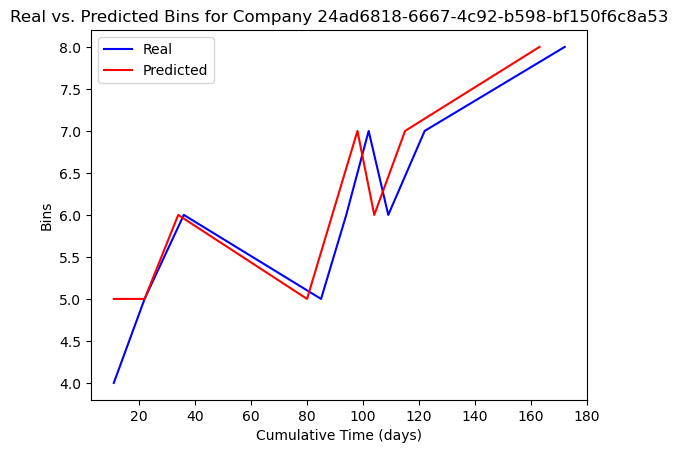

Company 26bc64a2-2165-4750-9333-31e15d814a3e
Mean absolute error (bins): 0.08333333333333333
Mean absolute percentage error (bins): 0.8333333333333334%
Mean absolute error (days): 11.583333333333334
Mean absolute percentage error (days): 12.44532002245251%


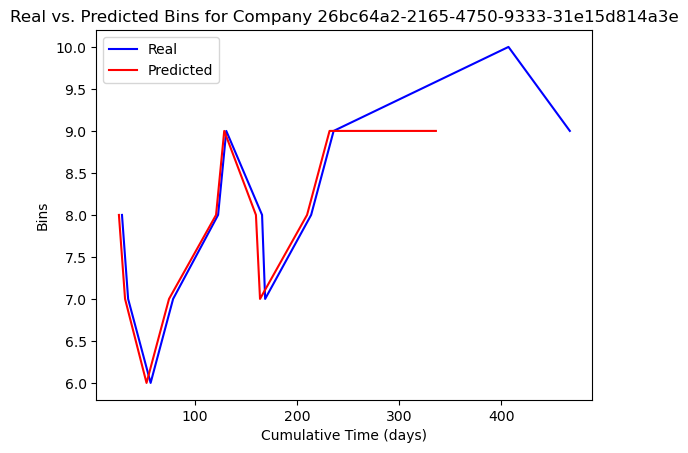

Company 2c06ab56-5272-42a3-878a-b2393cc44153
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 25.93103448275862
Mean absolute percentage error (days): 7.144763621894897%


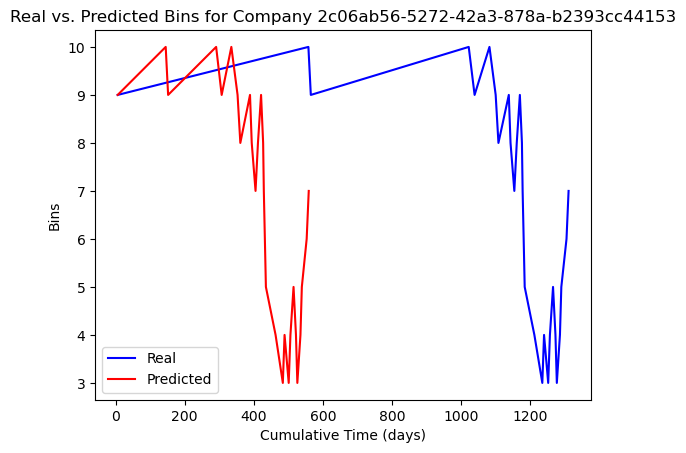

Company 30798910-0baf-43ff-b041-5326751ef05d
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.23529411764705882
Mean absolute percentage error (days): 0.6706879128039293%


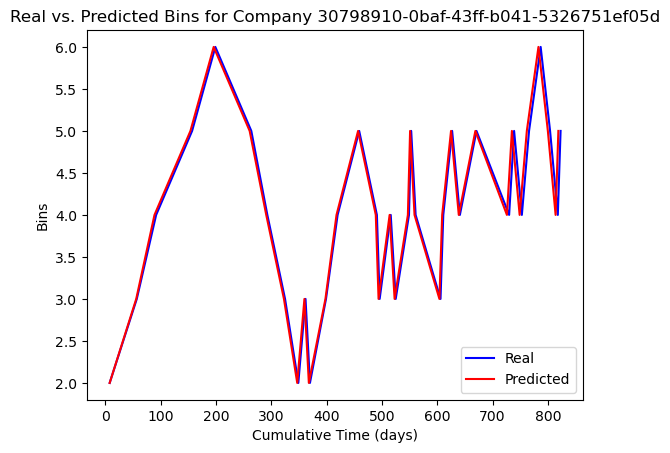

Company 39a9b1f6-2b5d-4a09-84d4-0865308edb55
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 2.3333333333333335
Mean absolute percentage error (days): 7.485300426476897%


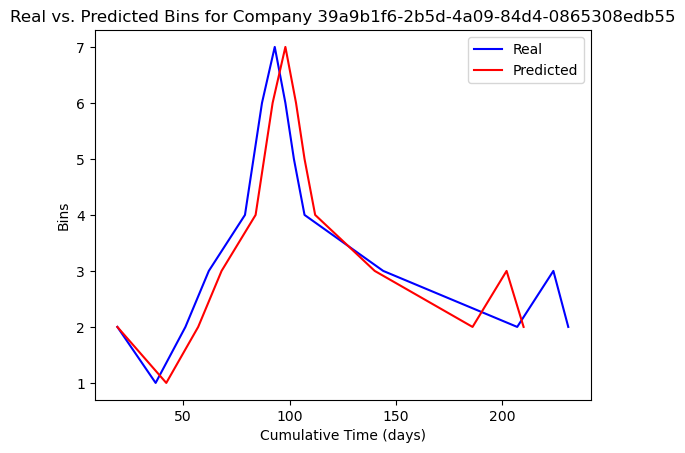

Company 3cd814a4-acb0-40f0-ab7b-e13a3b7c2dab
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 3.986111111111111
Mean absolute percentage error (days): 6.948092945090141%


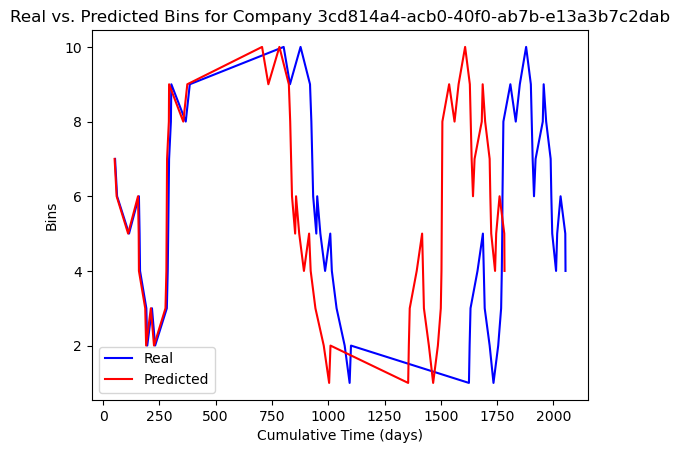

Company 3e31e41a-8950-4f97-901e-0d069ce50a05
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.8571428571428571
Mean absolute percentage error (days): 15.433087027914613%


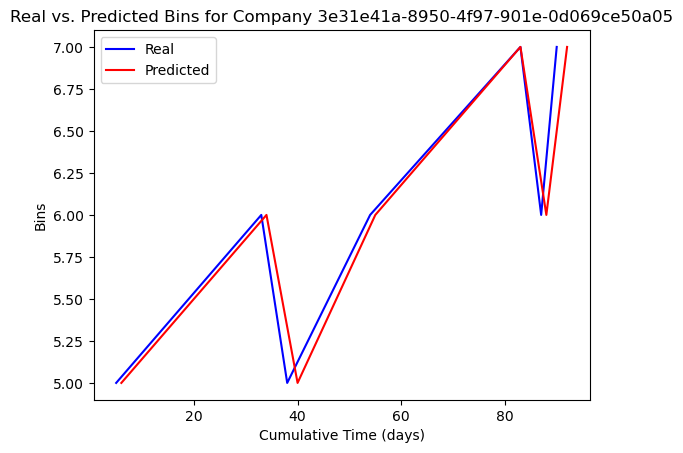

Company 4177dd28-059d-493d-a2ba-1e2d4c55b155
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 3.5
Mean absolute percentage error (days): 3.8982960770214263%


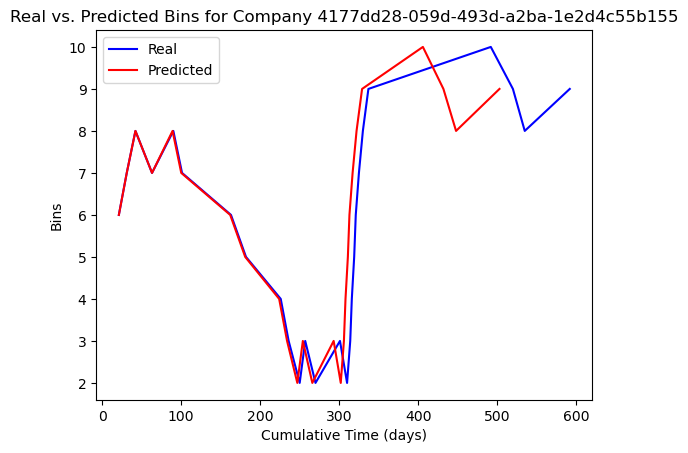

Company 480dc899-3b50-4ce3-9e4c-a7c9eafc8248
Mean absolute error (bins): 0.10714285714285714
Mean absolute percentage error (bins): 1.0714285714285716%
Mean absolute error (days): 8.357142857142858
Mean absolute percentage error (days): 14.095462825631602%


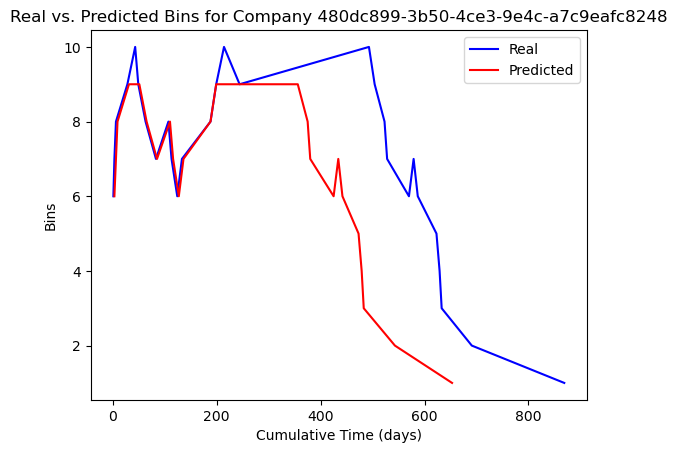

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import data from CSV
data = pd.read_csv('Final-data-with-bins-days-R1.csv', header=None, names=['Date', 'Company', 'Bin', 'Days'])  
# Select the first 20 company IDs
unique_company_ids = data['Company'].unique()[:20]

# Initialize lists to store MAE and MAPE values for all companies
mae_bins_all = []
mape_bins_all = []
mae_days_all = []
mape_days_all = []

for company_id in unique_company_ids:
    company_data = data[data['Company'] == company_id]

    # Sort the data by date
    company_data = company_data.sort_values(by='Date')
    company_data.reset_index(drop=True, inplace=True)

    # Prepare the input features and targets for training and testing
    X = company_data[['Bin', 'Days']].values
    y_bin = company_data['Bin'].values
    y_days = company_data['Days'].values

    n = len(company_data)
    if n < 15 : # Not enough data for training and testing
        continue

    # Split data into training and testing sets chronologically
    n_train = int(n * 0.7)
    X_train, X_test = X[:n_train], X[n_train:]
    y_bin_train, y_bin_test = y_bin[:n_train], y_bin[n_train:]
    y_days_train, y_days_test = y_days[:n_train], y_days[n_train:]

    # Train a RandomForestRegressor model for bins
    model_bin = RandomForestRegressor(n_estimators=100, random_state=42)
    model_bin.fit(X_train, y_bin_train)

    # Train a RandomForestRegressor model for days
    model_days = RandomForestRegressor(n_estimators=100, random_state=42)
    model_days.fit(X_train, y_days_train)

    # Make predictions using the testing set
    y_pred_bin = model_bin.predict(X_test)
    y_pred_days = model_days.predict(X_test)

    # Round the predicted bins and days to the nearest integers
    predicted_bins = np.round(y_pred_bin).astype(int)
    predicted_days = np.round(y_pred_days).astype(int)

    # Calculate the cumulative time for real and predicted values
    cumulative_time_real = np.cumsum(y_days_test)
    cumulative_time_predicted = np.cumsum(predicted_days)

    # Calculate MAE and MAPE
    mae_bin = mean_absolute_error(y_bin_test, predicted_bins)
    mape_bin = mean_absolute_percentage_error(y_bin_test, predicted_bins)
    mae_days = mean_absolute_error(y_days_test, predicted_days)
    mape_days = mean_absolute_percentage_error(y_days_test, predicted_days)
    
    # Store the MAE and MAPE values in the lists
    mae_bins_all.append(mae_bin)
    mape_bins_all.append(mape_bin)
    mae_days_all.append(mae_days)
    mape_days_all.append(mape_days)

    print(f"Company {company_id}")
    print(f"Mean absolute error (bins): {mae_bin}")
    print(f"Mean absolute percentage error (bins): {mape_bin * 100}%")
    print(f"Mean absolute error (days): {mae_days}")
    print(f"Mean absolute percentage error (days): {mape_days * 100}%")

    # Create the plot
    fig, ax = plt.subplots()

    # Plot the real values
    ax.plot(cumulative_time_real, y_bin_test, label='Real', color='blue')

    # Plot the predicted values
    ax.plot(cumulative_time_predicted, predicted_bins, label='Predicted', color='red')

    # Set labels and title for the plot
    ax.set_xlabel('Cumulative Time (days)')
    ax.set_ylabel('Bins')
    ax.set_title(f'Real vs. Predicted Bins for Company {company_id}')
    ax.legend()

    # Show the plot
    plt.show()


In [2]:
#R1
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.020967910083022994
Average MAPE for bins: 0.8471792944323037%
Average MAE for days: 2.633665147100524
Average MAPE for days: 3.948399857663206%


In [4]:
#R2
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.03431777637639129
Average MAPE for bins: 1.370913181294935%
Average MAE for days: 4.05822804059877
Average MAPE for days: 6.277405121043156%


In [6]:
#R3
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.04939501250849844
Average MAPE for bins: 1.9265221453212837%
Average MAE for days: 5.789471924850327
Average MAPE for days: 8.927624162148001%


In [8]:
#R4
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.0526817103583725
Average MAPE for bins: 2.3777419256173804%
Average MAE for days: 7.31485299579855
Average MAPE for days: 9.953797068240345%


In [10]:
#R5
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.11380852367641446
Average MAPE for bins: 4.135079838243287%
Average MAE for days: 14.623815754932785
Average MAPE for days: 22.279223957867195%
